In [2]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/marcio/Dokumente/Unicamp-Ubuntu/IE009/Projeto'

In [4]:
d5 = pd.read_csv('d5.csv',sep=',',header=None)
d5.head()

,0,1,2,3,4,5,6,7,8,9,...,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046
0,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,...,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2


In [5]:
d10 = pd.read_csv('d10.csv',sep=',',header=None)
d10.head()

,0,1,2,3,4,5,6,7,8,9,...,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,10.42,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,...,10.42,10.42,10.42,10.42,10.42,10.42,10.42,10.42,10.42,10.42


In [6]:
d15 = pd.read_csv('d15.csv',sep=',',header=None)
d15.head()

,0,1,2,3,4,5,6,7,8,9,...,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,14.82,14.81,14.81,14.81,14.81,14.81,14.81,14.81,14.81,14.81,...,15.27,15.27,15.27,15.27,15.27,15.27,15.27,15.27,15.27,15.27


In [12]:
vel = pd.read_csv('vel.csv', sep=',',header=None)
vel.head()

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
0,8,8,8,8,8,8,8,8,8,8.43,...,20.65,20.65,20.65,20.65,20.65,20.65,20.65,20.65,20.65,20.65


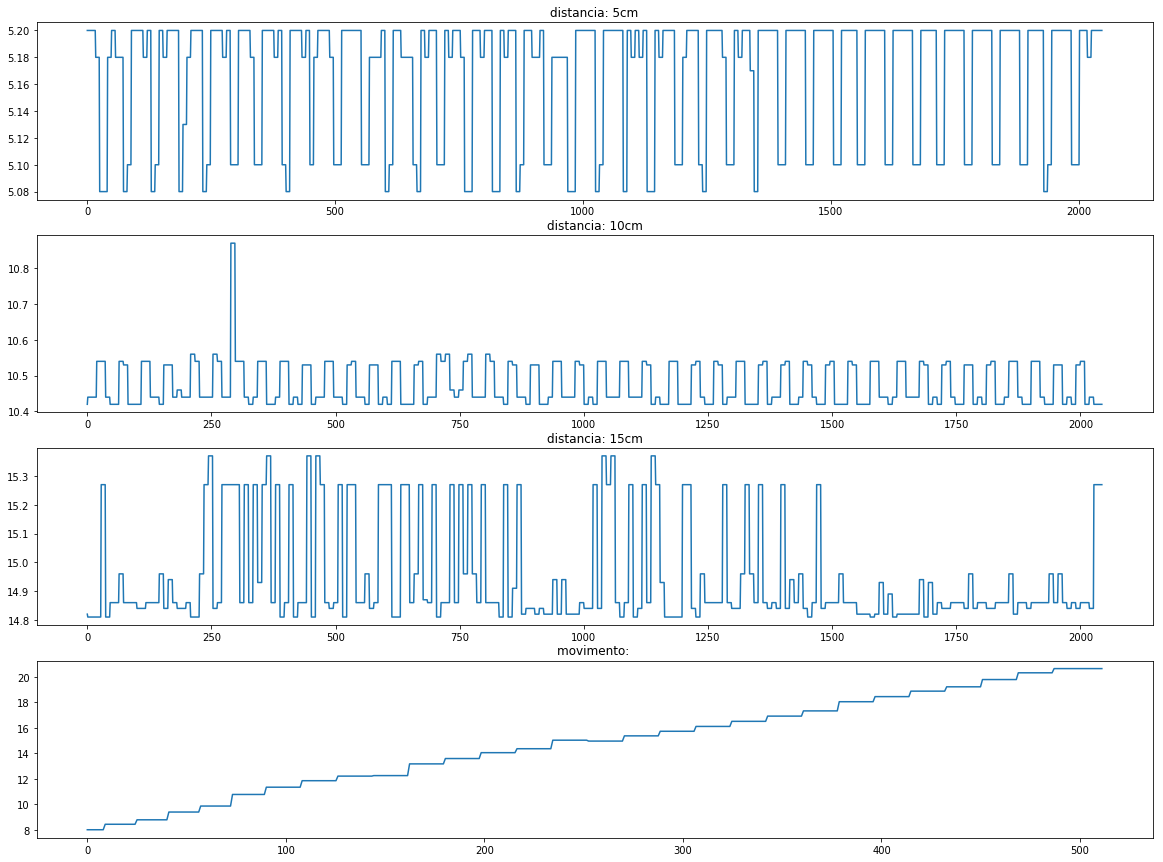

In [17]:
plt.figure(figsize=(20,15))

plt.subplot(4,1,1)
d5_v = d5.values
plt.title('distancia: 5cm')

plt.plot(np.linspace(0,len(d5_v[0]),len(d5_v[0])),d5_v[0])

plt.subplot(4,1,2)
d10_v = d10.values
plt.title('distancia: 10cm')
plt.plot(np.linspace(0,len(d10_v[0]),len(d10_v[0])),d10_v[0])

plt.subplot(4,1,3)
d15_v = d15.values
plt.title('distancia: 15cm')
plt.plot(np.linspace(0,len(d15_v[0]),len(d15_v[0])),d15_v[0])

plt.subplot(4,1,4)
vel_v = vel.values
plt.title('movimento: ')
plt.plot(np.linspace(0,len(vel_v[0]),len(vel_v[0])),vel_v[0])


In [124]:
def kalman_filter1D(x0,P0,R,z):
    x =np.zeros(len(z)+1)
    x_pred = np.zeros(len(z)+1)
    P_pred = np.zeros(len(z)+1)
    K = np.zeros(len(z)+1)
    P = np.zeros(len(z)+1)

    x[0] = x0
    P[0] = P0


    #for k in arange(1,11):
    for k in np.arange(1,len(z)+1):
        #print("k: ",k)
        #Time Update Equations
        x_pred[k] = x[k-1]
        P_pred[k] = P[k-1]
        #print('x_pred[' + str(k)+']=',x_pred[k])
        #print('P_pred[' + str(k)+']=',P_pred[k])
        #print("\n")



        #Measurement Update
        
        #Kalman Gain Calculation
        K[k] = P_pred[k]/(P_pred[k]+ R)
        #print('K[' + str(k)+']=',K[k])
        #print("\n")
    
        #Update Estimate using z[k]
        #array z is zero indexed
        x[k] = x_pred[k] + K[k]*(z[k-1]-x_pred[k])
        #print('x[' + str(k)+']=',x[k])

        #Update error covariance
        P[k] = (1-K[k])*P_pred[k]
        #print('P[' + str(k)+']=',P[k])
    
    np.set_printoptions(precision=3)    
    #print("z:    ",z)
    #print("x(-): ",x_pred)
    #print("x:    ",x)
    #print("P(-): ",P_pred)
    print("K:    ",K)  
    #print(len(x),len(x_pred))
    
    return (z,x_pred,x,P_pred,K)


[10.42 10.44 10.44 ... 10.42 10.42 10.42]


In [66]:

A = kalman_filter1D(0,1,0.01,z)

K:     [0.000e+00 9.091e-01 4.762e-01 ... 4.899e-04 4.897e-04 4.895e-04]


#### Aplicando Filtro de Kalman (Caso Estático)

[10.42 10.44 10.44 10.44 10.44 10.44 10.44 10.44 10.44 10.44]
K:     [0.000e+00 9.901e-01 4.975e-01 ... 4.900e-04 4.897e-04 4.895e-04]
2043
2044
2044


Text(0.5, 1.0, 'Kalman Gain (K) and Predicted P')

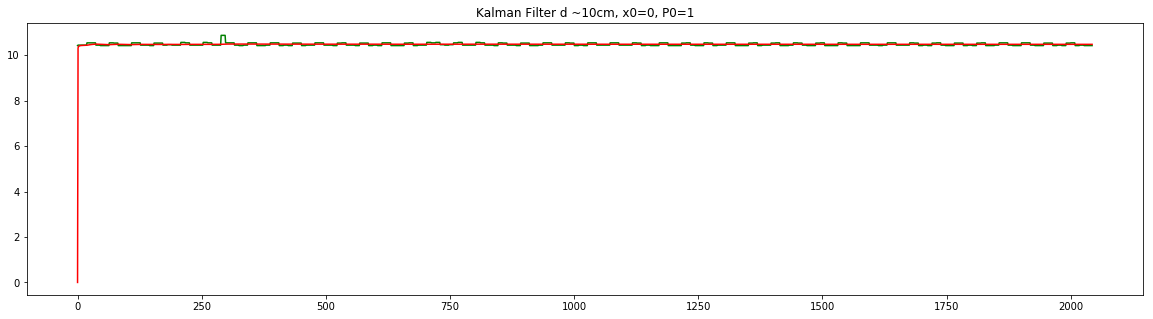

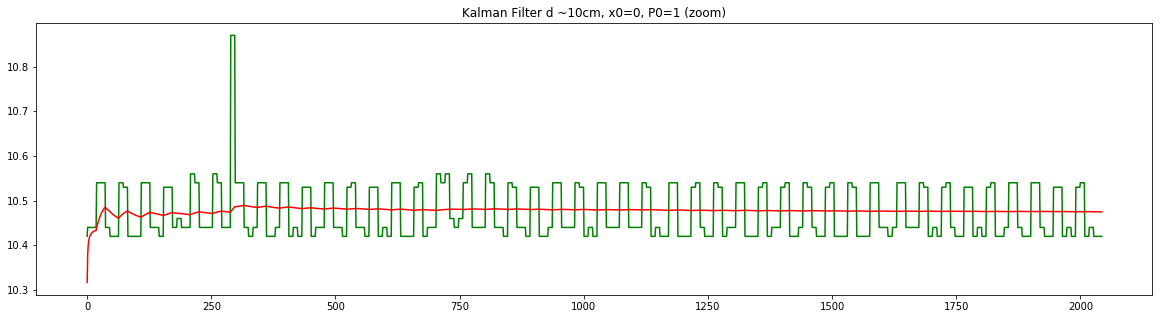

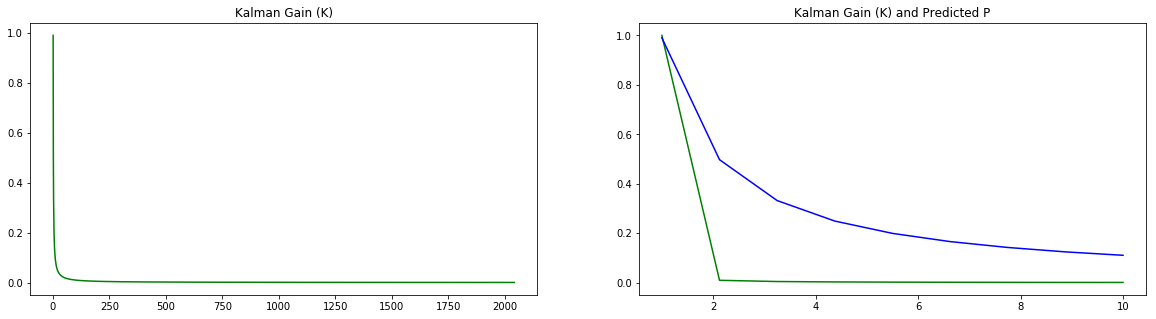

In [141]:
z = d10_v[0]
type(z)
print(z[:10])


#A = kalman_filter1D(0,1,0.1,z)
#parameters(x0,P0,R,numbers)
A = kalman_filter1D(0,1,0.01,z)

real = A[0]
x_axis = np.linspace(0,len(real),len(real))
print(len(real))
x_est = A[1]
print(len(x_est))
x_calc = A[2]
print(len(x_calc))

plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,A[0],'g')
plt.plot(x_axis,A[2][:-1],'r')
plt.title('Kalman Filter d ~10cm, x0=0, P0=1')



plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,A[0],'g')
plt.plot(x_axis,A[2][1:],'r')
plt.title('Kalman Filter d ~10cm, x0=0, P0=1 (zoom)')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x_axis = np.linspace(1,len(real),len(real))
plt.plot(x_axis,A[4][1:],'g')
plt.title('Kalman Gain (K)')


plt.subplot(1,2,2)
x_axis = np.linspace(1,10,9)
plt.plot(x_axis,A[3][1:10],'g')
plt.plot(x_axis,A[4][1:10],'b')
plt.title('Kalman Gain (K) and Predicted P')

[14.82 14.81 14.81 14.81 14.81 14.81 14.81 14.81 14.81 14.81]
K:     [0.000e+00 5.000e-01 3.333e-01 ... 4.897e-04 4.895e-04 4.892e-04]
2043
2044
2044


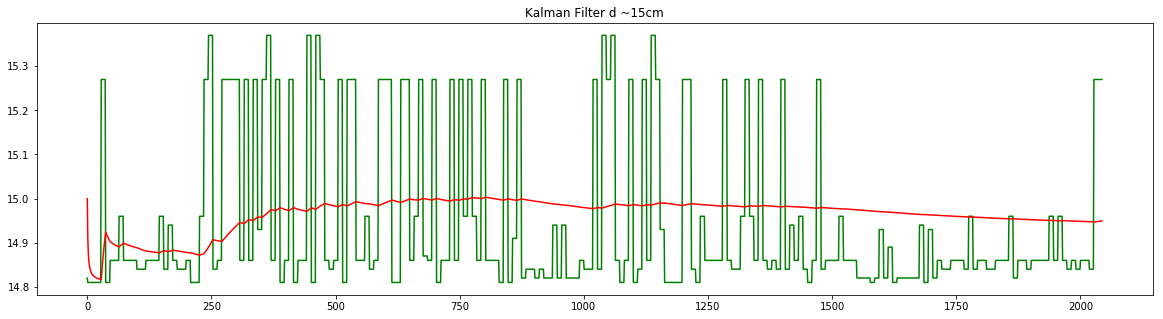

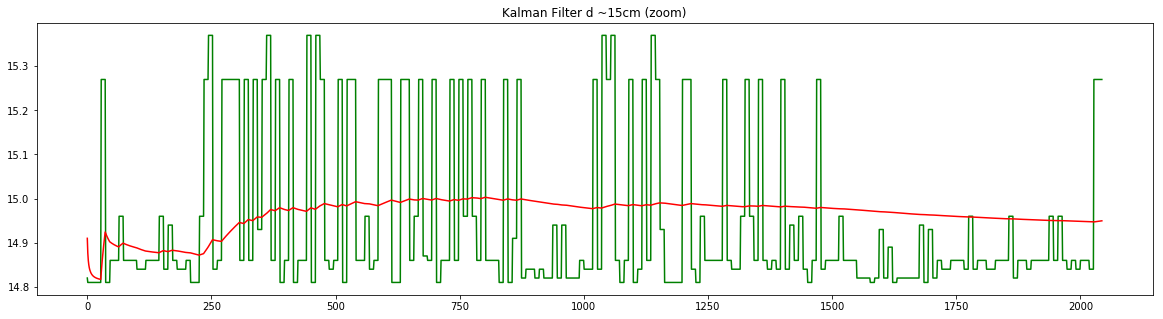

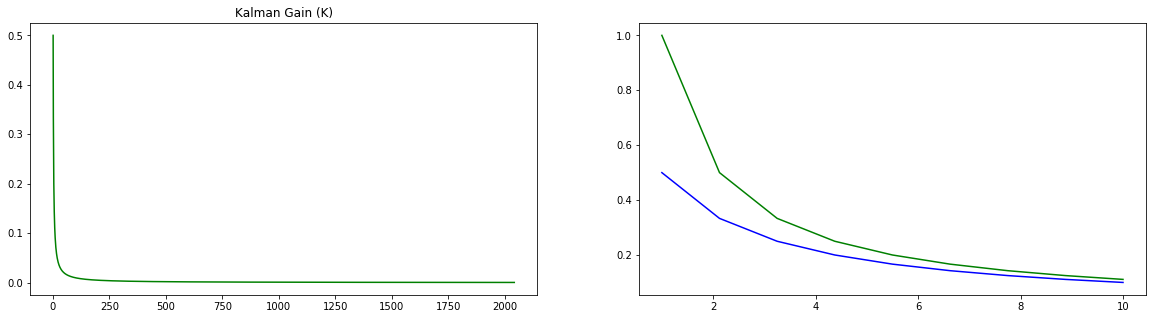

In [143]:
z = d15_v[0]
type(z)
print(z[:10])


#A = kalman_filter1D(0,1,0.1,z)
#parameters(x0,P0,R,numbers)
B = kalman_filter1D(15.,1,1,z)

real = B[0]
x_axis = np.linspace(0,len(real),len(real))
print(len(real))
x_est = B[1]
print(len(x_est))
x_calc = B[2]
print(len(x_calc))

plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,B[0],'g')
plt.plot(x_axis,B[2][:-1],'r')
plt.title('Kalman Filter d ~15cm')



plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,B[0],'g')
plt.plot(x_axis,B[2][1:],'r')
plt.title('Kalman Filter d ~15cm (zoom)')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x_axis = np.linspace(1,len(real),len(real))
plt.plot(x_axis,B[4][1:],'g')
plt.title('Kalman Gain (K)')


plt.subplot(1,2,2)
x_axis = np.linspace(1,10,9)
plt.plot(x_axis,B[3][1:10],'g')
plt.plot(x_axis,B[4][1:10],'b')

In [ ]:
z = d15_v[0]
type(z)
print(z)


#A = kalman_filter1D(0,1,0.1,z)
#parameters(x0,P0,R,numbers)
B = kalman_filter1D(12,1,0.01,z)

real = B[0]
x_axis = np.linspace(0,len(real),len(real))
print(len(real))
x_est = B[1]
print(len(x_est))
x_calc = B[2]
print(len(x_calc))

plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,B[0],'g')
plt.plot(x_axis,B[2][:-1],'r')
plt.title('Kalman Filter d ~15cm')



plt.figure(figsize=(20,5))
x_axis = np.linspace(0,len(real),len(real))
plt.plot(x_axis,B[0],'g')
plt.plot(x_axis,B[2][1:],'r')
plt.title('Kalman Filter d ~15cm (zoom)')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x_axis = np.linspace(1,len(real),len(real))
plt.plot(x_axis,B[4][1:],'g')
plt.title('Kalman Gain (K)')


plt.subplot(1,2,2)
x_axis = np.linspace(1,10,9)
plt.plot(x_axis,B[3][1:10],'g')
plt.plot(x_axis,B[4][1:10],'b')

In [120]:
print(A[4][1])
print(A[4][2043])

0.9900990099009901
0.0004894738645430035


In [87]:
np.where(A[3] == np.amax(A[3]))

(array([1]),)

In [145]:
def kalman_filter_vel(x0,P0,R,z):
    #x0,P0,R,z
    x =np.zeros(len(z)+1)
    x_pred = np.zeros(len(z)+1)
    P_pred = np.zeros(len(z)+1)
    K = np.zeros(len(z)+1)
    P = np.zeros(len(z)+1)

    x[0] = x0
    P[0] = P0


    #for k in arange(1,11):
    for k in np.arange(1,len(z)+1):
        #print("k: ",k)
        #Time Update Equations
        x_pred[k] = x[k-1]
        P_pred[k] = P[k-1]
        #print('x_pred[' + str(k)+']=',x_pred[k])
        #print('P_pred[' + str(k)+']=',P_pred[k])
        #print("\n")



        #Measurement Update
        K[k] = P_pred[k]/(P_pred[k]+ R)
        #print('K[' + str(k)+']=',K[k])
        #print("\n")
    
        #array z is zero indexed
        x[k] = x_pred[k] + K[k]*(z[k-1]-x_pred[k])
        #print('x[' + str(k)+']=',x[k])

        P[k] = (1-K[k])*P_pred[k]
        #print('P[' + str(k)+']=',P[k])
    
        #x_pred[k] = x[k]
        #P_pred[k] = P[k]
    
    np.set_printoptions(precision=3)    
    #print("z:    ",z)
    #print("x(-): ",x_pred)
    #print("x:    ",x)
    #print("P(-): ",P_pred)
    #print("K:    ",K)  
    #print(len(x),len(x_pred))
    
    return (z,x_pred,x,P_pred,K)


In [39]:
z_vel = vel_v[0]
type(z_vel)
print(z_vel[:100])

[ 8.    8.    8.    8.    8.    8.    8.    8.    8.    8.43  8.43  8.43
  8.43  8.43  8.43  8.43  8.43  8.43  8.43  8.43  8.43  8.43  8.43  8.43
  8.43  8.78  8.78  8.78  8.78  8.78  8.78  8.78  8.78  8.78  8.78  8.78
  8.78  8.78  8.78  8.78  8.78  9.39  9.39  9.39  9.39  9.39  9.39  9.39
  9.39  9.39  9.39  9.39  9.39  9.39  9.39  9.39  9.39  9.86  9.86  9.86
  9.86  9.86  9.86  9.86  9.86  9.86  9.86  9.86  9.86  9.86  9.86  9.86
  9.86 10.77 10.77 10.77 10.77 10.77 10.77 10.77 10.77 10.77 10.77 10.77
 10.77 10.77 10.77 10.77 10.77 10.77 11.34 11.34 11.34 11.34 11.34 11.34
 11.34 11.34 11.34 11.34]


In [144]:
B = kalman_filter1D(0,50,1,z_vel)

K:     [0.    0.98  0.495 0.331 0.249 0.199 0.166 0.142 0.125 0.111 0.1   0.091
 0.083 0.077 0.071 0.067 0.062 0.059 0.055 0.053 0.05  0.048 0.045 0.043
 0.042 0.04  0.038 0.037 0.036 0.034 0.033 0.032 0.031 0.03  0.029 0.029
 0.028 0.027 0.026 0.026 0.025 0.024 0.024 0.023 0.023 0.022 0.022 0.021
 0.021 0.02  0.02  0.02  0.019 0.019 0.019 0.018 0.018 0.018 0.017 0.017
 0.017 0.016 0.016 0.016 0.016 0.015 0.015 0.015 0.015 0.014 0.014 0.014
 0.014 0.014 0.014 0.013 0.013 0.013 0.013 0.013 0.012 0.012 0.012 0.012
 0.012 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011
 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.009 0.009
 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007
 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.006 0.006
 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0

2043
512
512


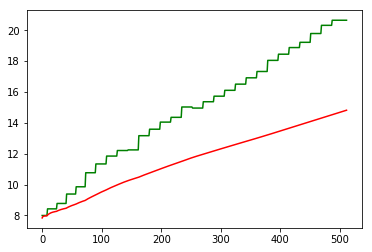

In [99]:
v_real = B[0]
x_axis = np.linspace(0,len(v_real),len(v_real))
print(len(real))
x_est = B[1]
print(len(x_est))
x_calc = B[2]
print(len(x_calc))
plt.plot(x_axis,B[0],'g')
plt.plot(x_axis,B[2][1:],'r')